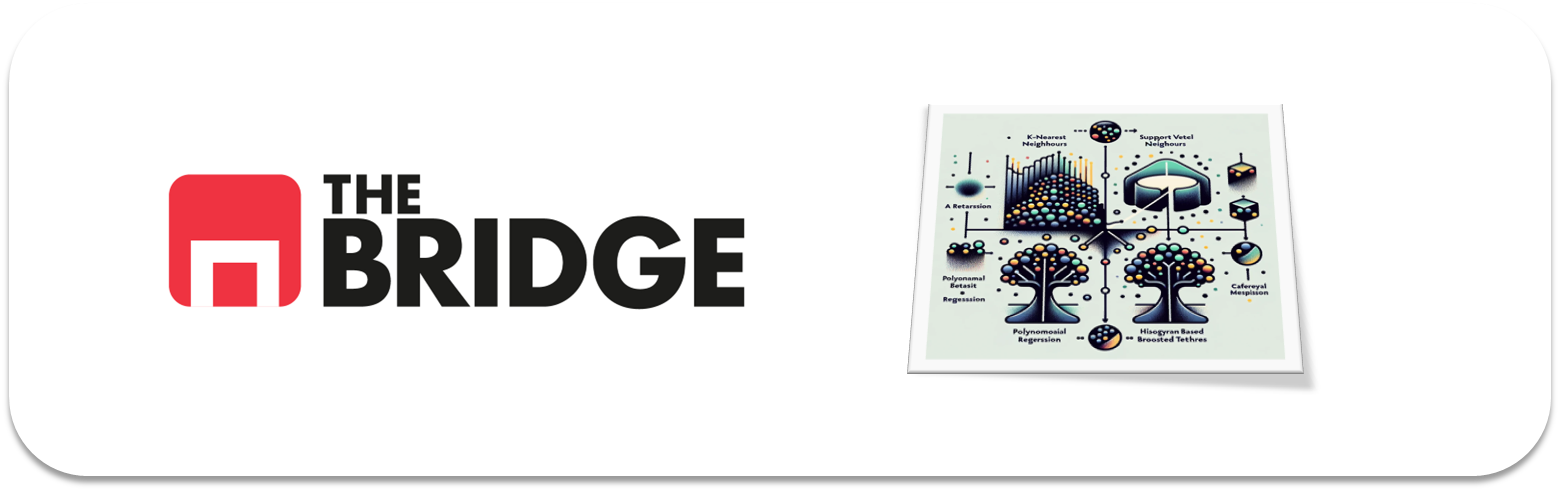

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import bootcampviztools as bt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, mean_absolute_percentage_error, make_scorer
from sklearn.linear_model import LinearRegression

from imblearn.over_sampling import SMOTE


### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.

Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [132]:
df = pd.read_csv('./data/wines_dataset.csv', sep = '|')
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

In [134]:
target_cat = 'quality'

In [135]:
train_set, test_set = train_test_split(df, test_size = 0.2, random_state=42)

### Análisis de la variable target

Distribución relativa de la variable target

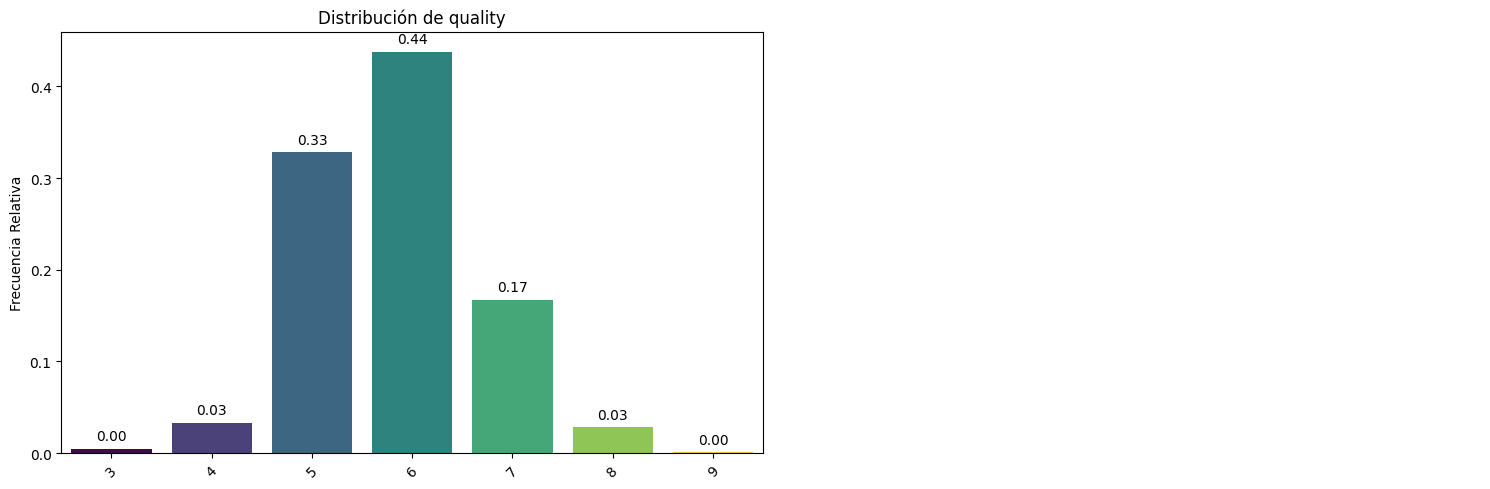

In [136]:
bt.pinta_distribucion_categoricas(train_set, [target_cat], mostrar_valores= True, relativa= True)

Distribución absoluta

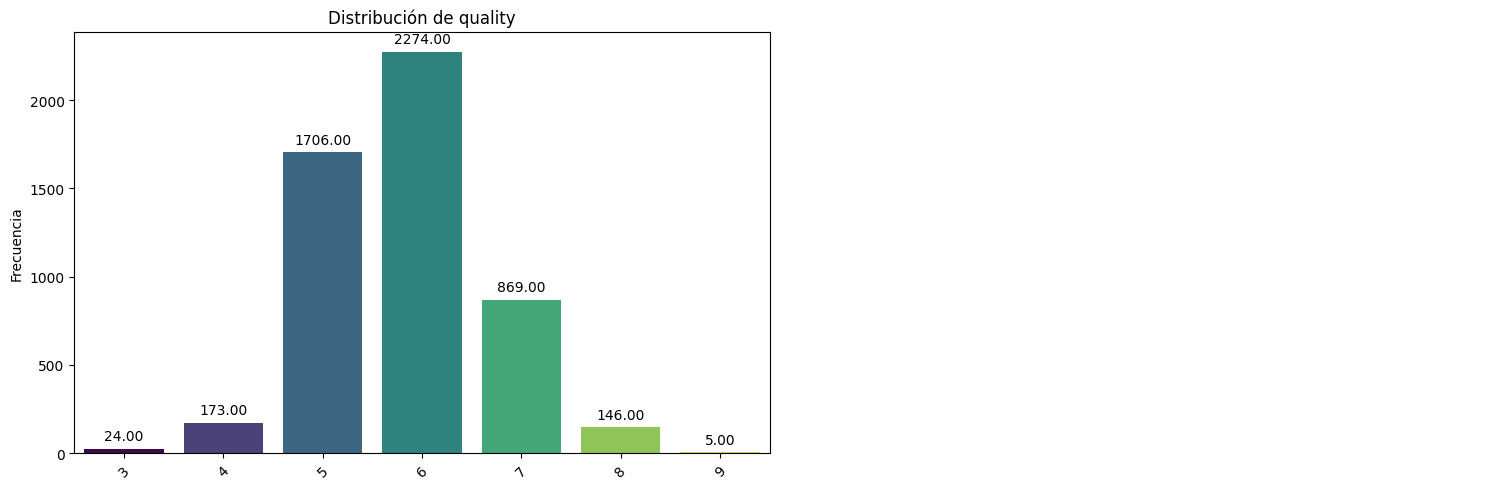

In [137]:
bt.pinta_distribucion_categoricas(train_set, [target_cat], mostrar_valores= True, relativa= False)

La variable target tiene una ``distribución desbalanceada`` ya que hay valores con una mayor frecuencia que otros.

### Análisis variables numéricas

In [138]:
train_set.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
1916,7.9,0.18,0.40,2.2,0.049,38.0,67.0,0.9960,3.33,0.93,11.3,5,red
947,7.1,0.18,0.74,15.6,0.044,44.0,176.0,0.9996,3.38,0.67,9.0,6,white


In [139]:
features_num = train_set.select_dtypes(include=['float','int']).columns.to_list()
features_num.remove(target_cat)
features_num

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [140]:
valores_target = train_set[target_cat].unique().tolist()

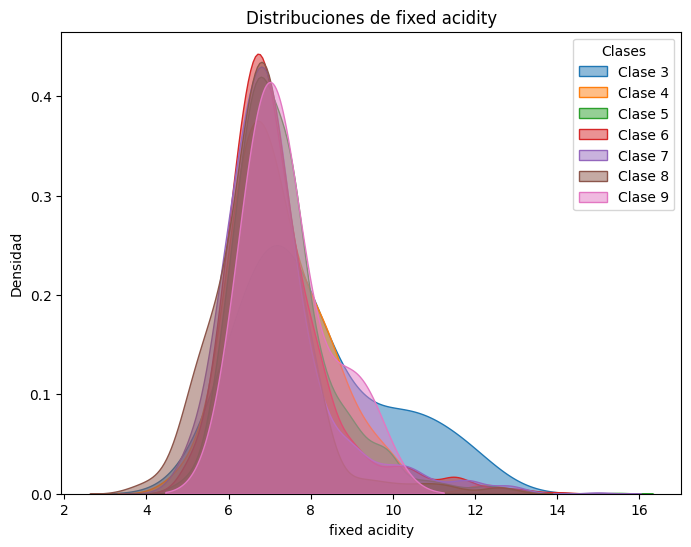

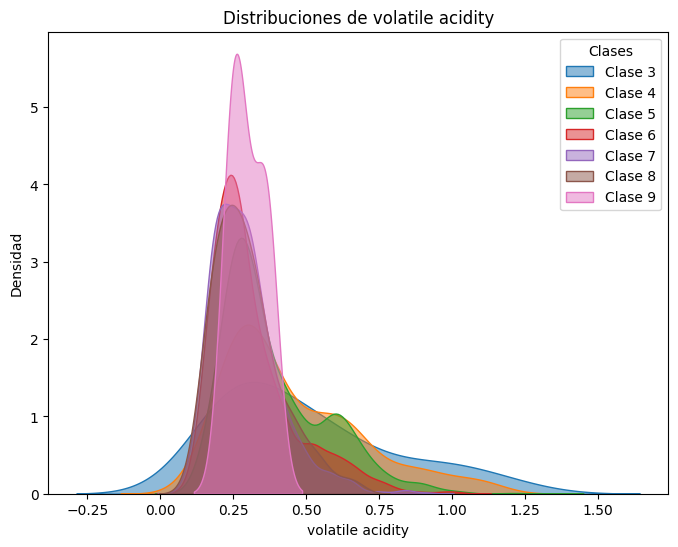

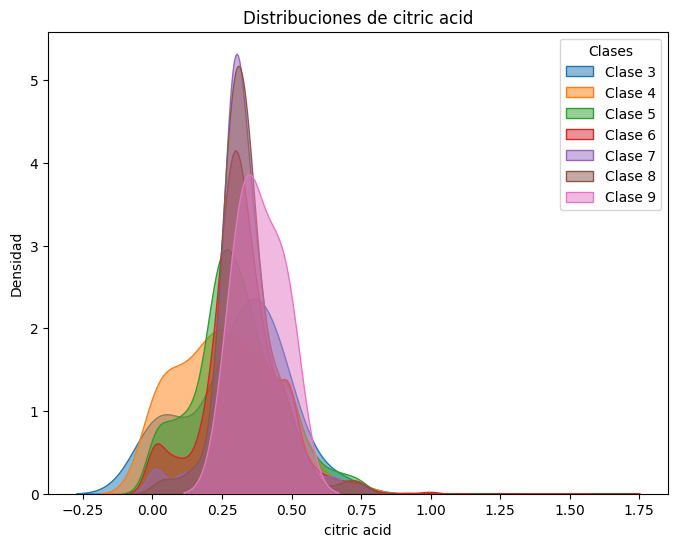

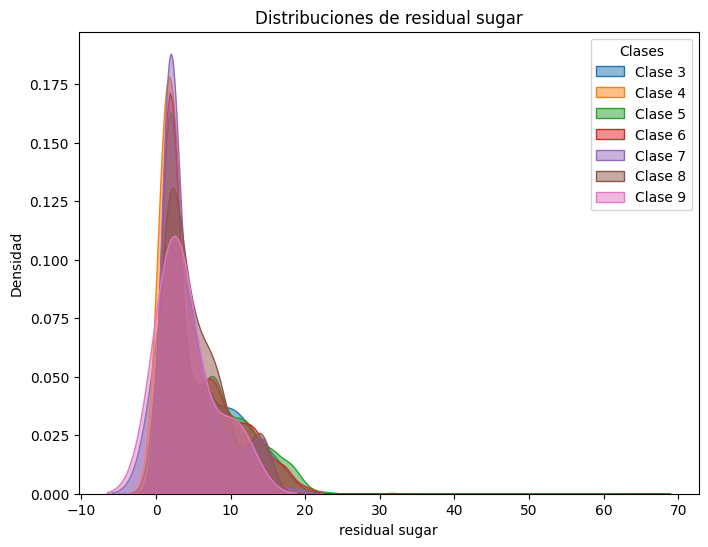

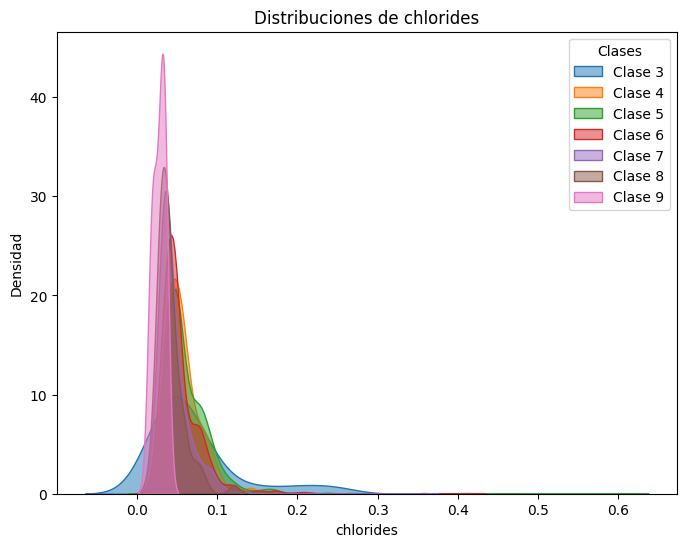

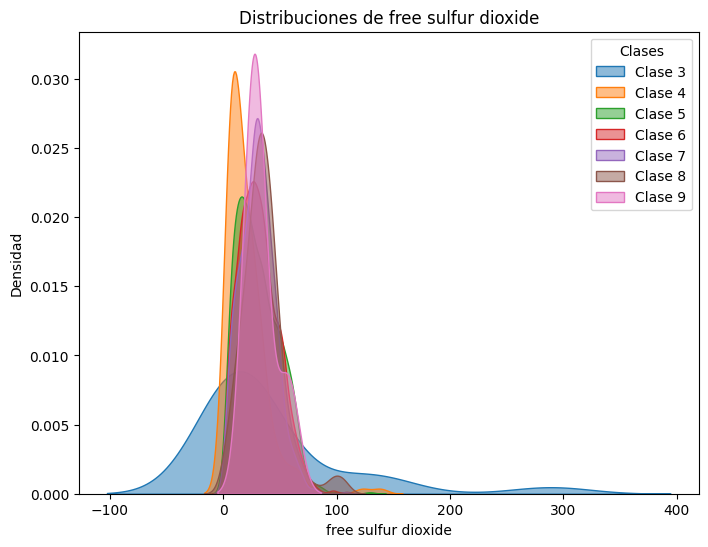

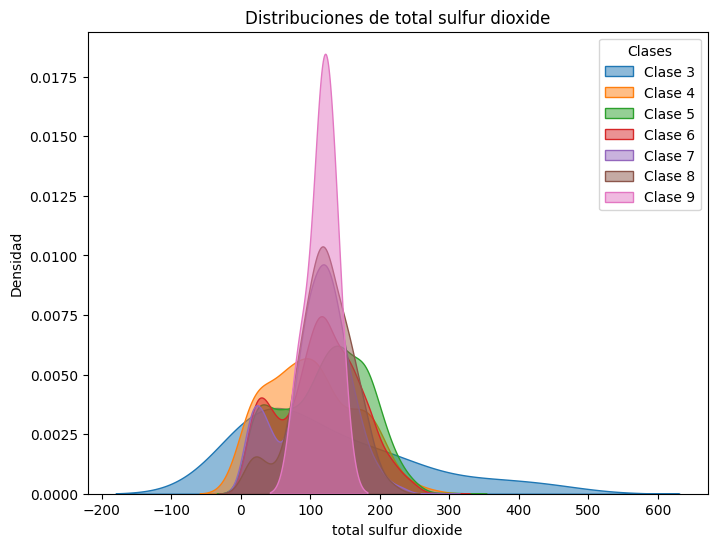

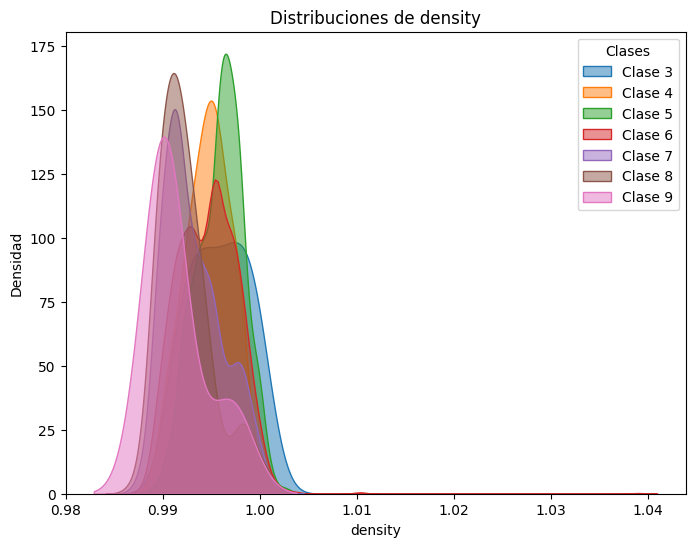

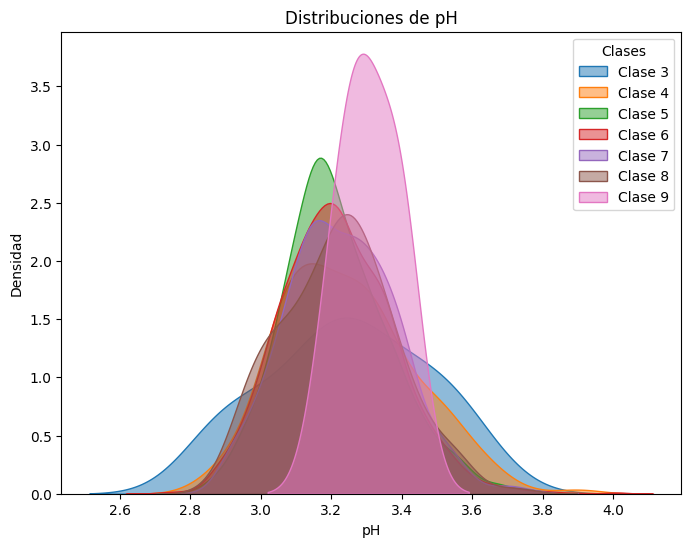

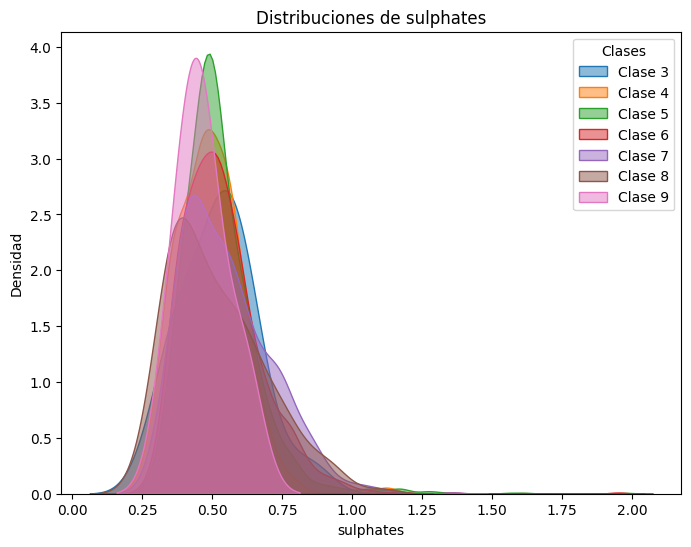

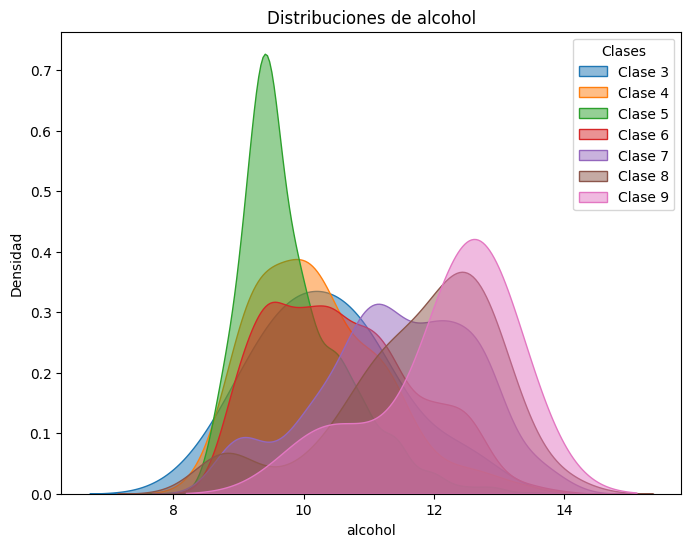

In [141]:
for col in features_num:
    plt.figure(figsize=(8,6))
    for i in sorted(valores_target):
        sns.kdeplot(train_set[train_set[target_cat] == i][col],
                    fill = True,
                    alpha = 0.5,
                    label = f'Clase {i}')
    plt.title(f'Distribuciones de {col}')
    plt.xlabel(col)
    plt.ylabel('Densidad')
    plt.legend(title = 'Clases')
    plt.show()

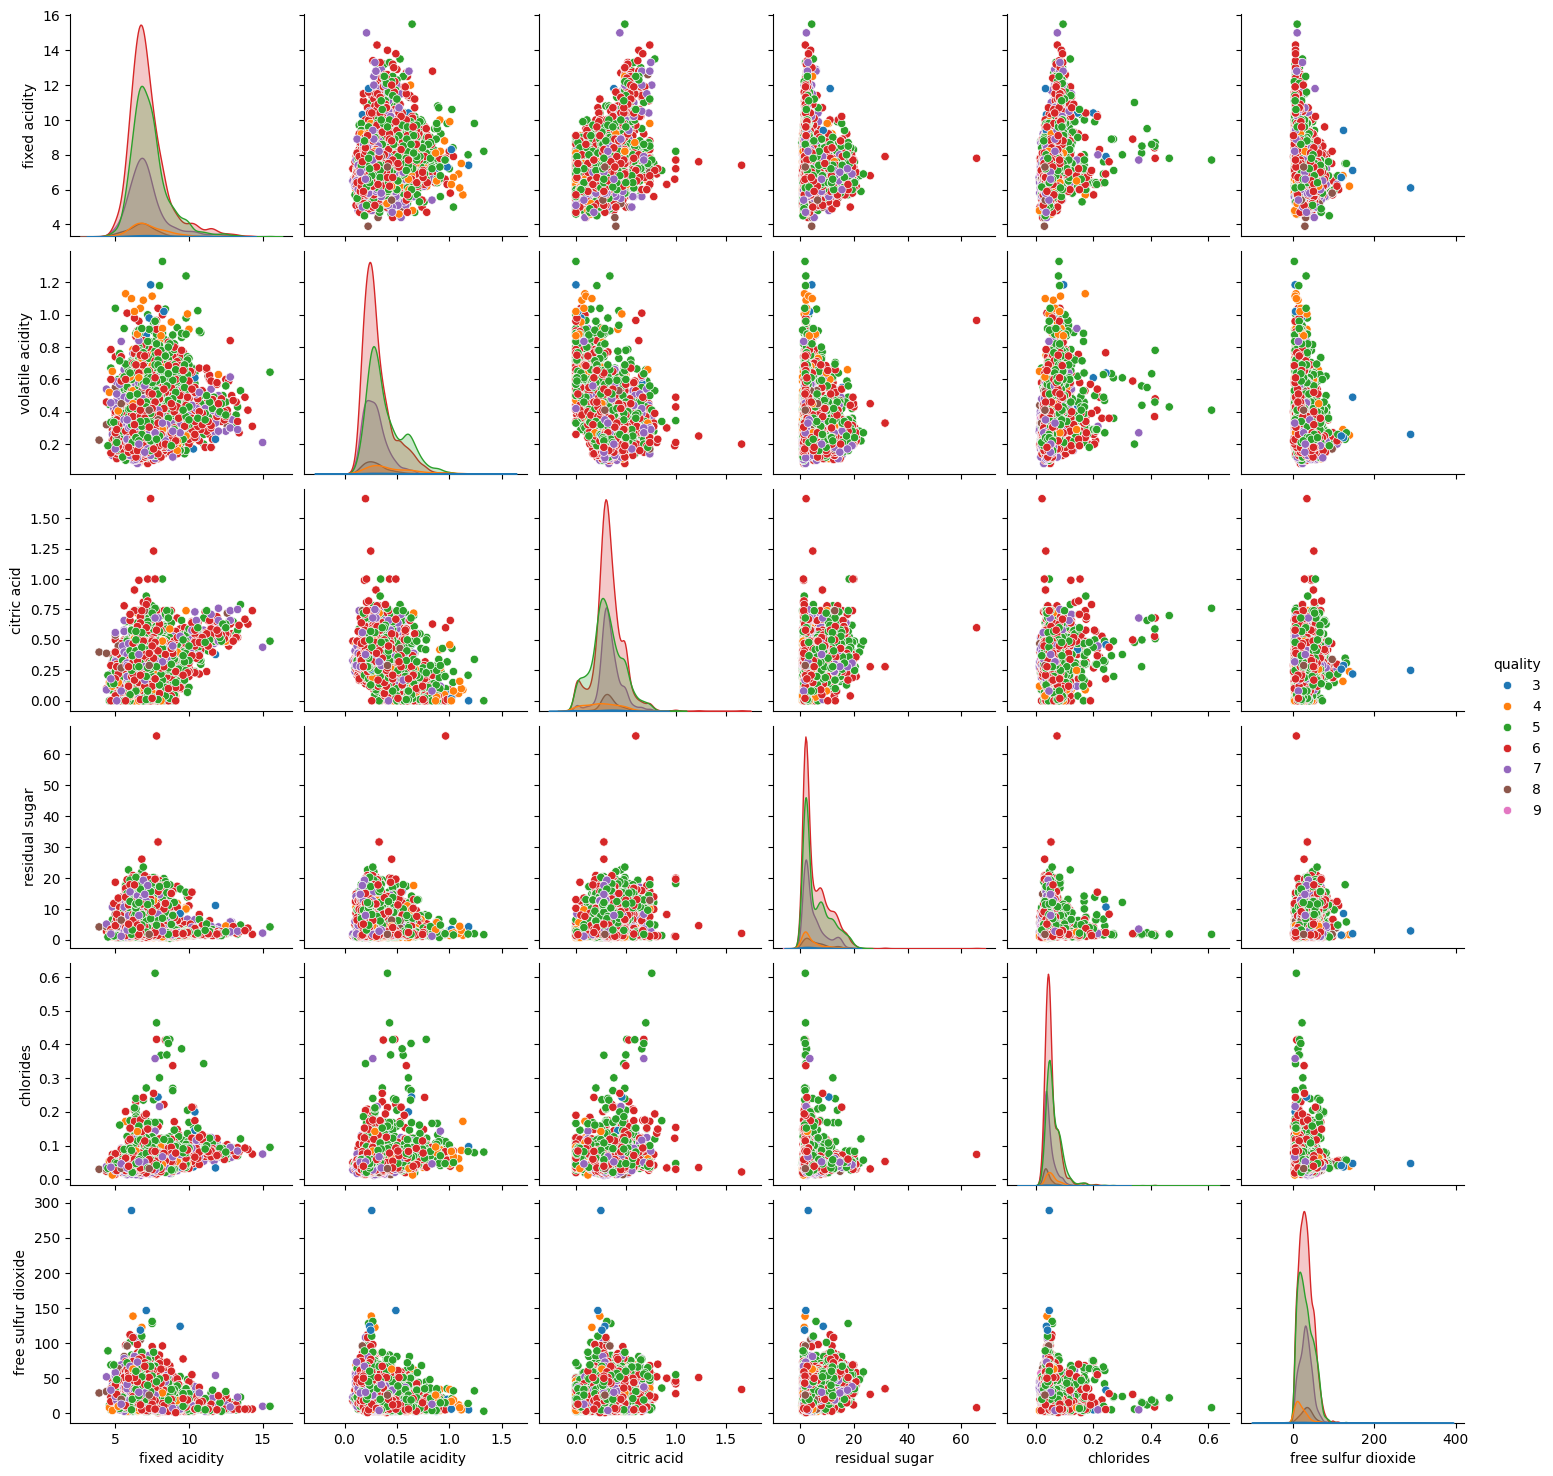

In [142]:
sns.pairplot(train_set[features_num[0:6] + [target_cat]], hue = target_cat, palette = 'tab10');

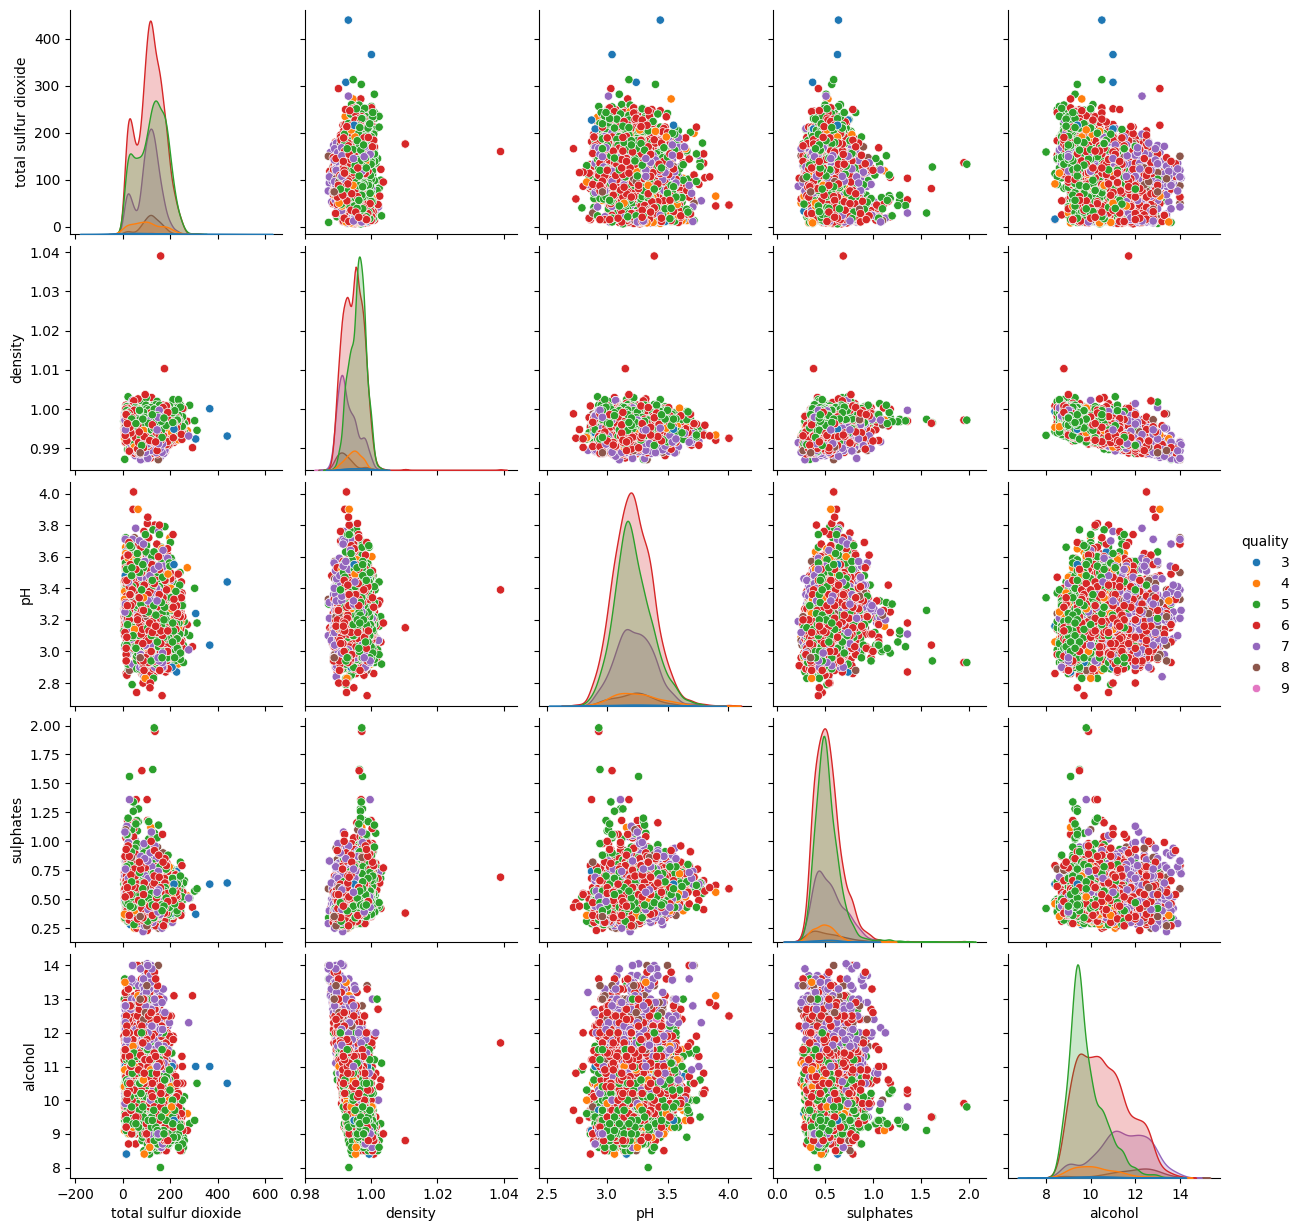

In [143]:
sns.pairplot(train_set[features_num[6:11] + [target_cat]], hue = target_cat, palette = 'tab10');

De momento nos quedamos con todas las variables numéricas para el modelo ya discriminan a la variable target.

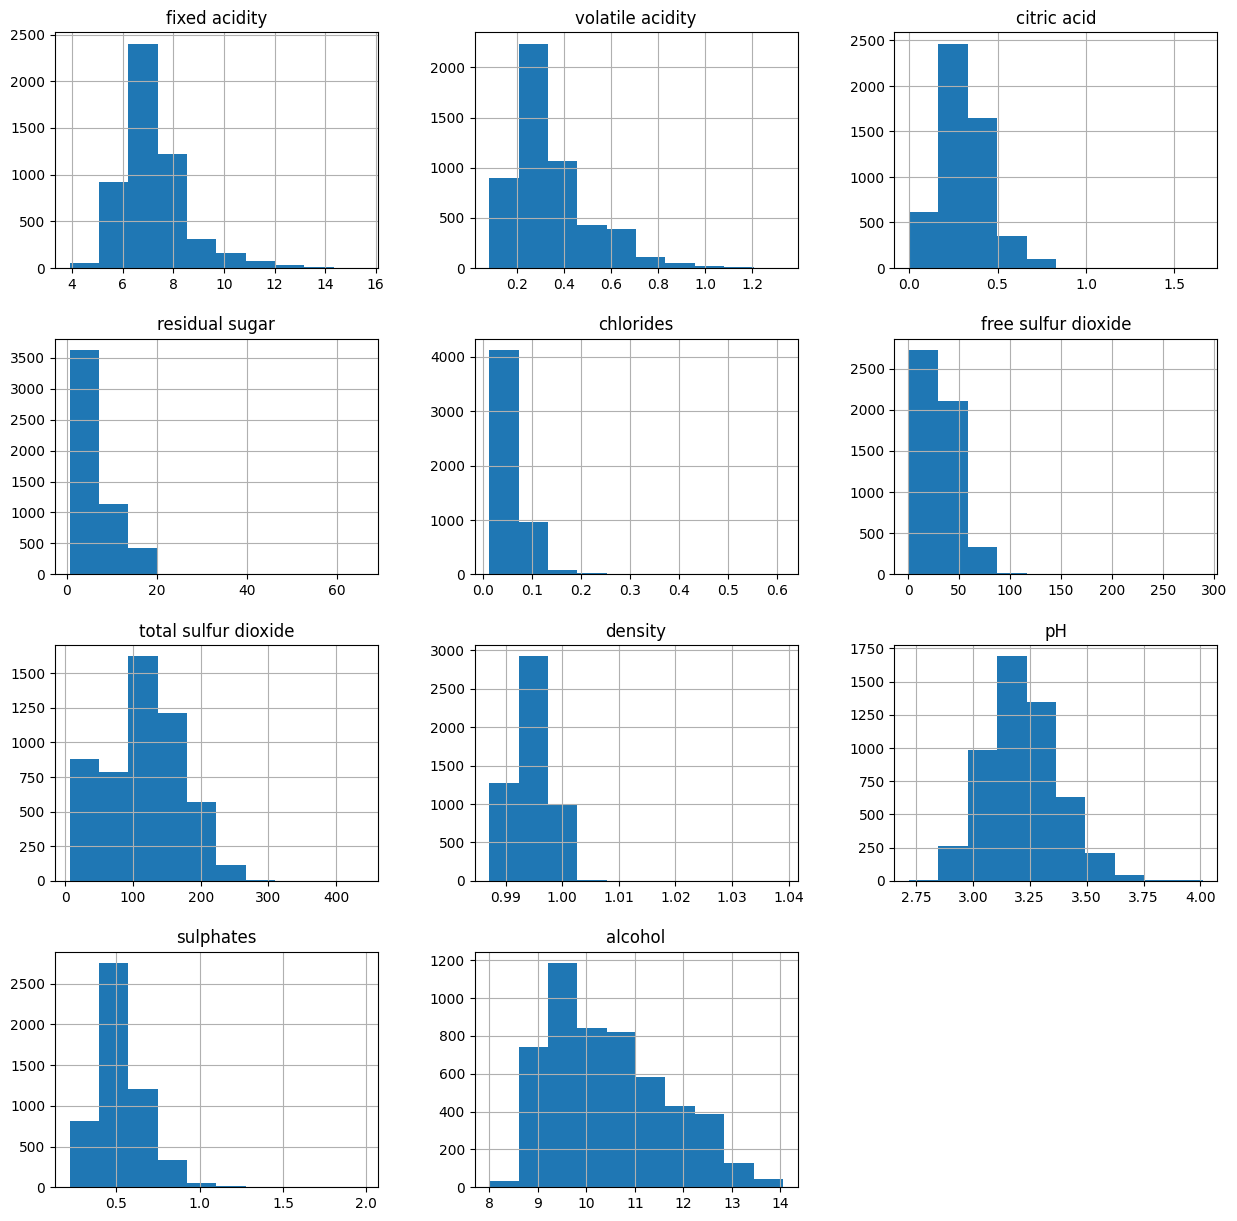

In [144]:
train_set[features_num].hist(figsize = (15,15));

Hay algunas variables que podemos normalizar para que le sienten mejor al modelo.

In [145]:
features_num_to_transform = ['residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide']

In [146]:
train_set_scaled = train_set.copy()
test_set_scaled = test_set.copy()

In [147]:
for col in features_num_to_transform:
    desplaza = 0
    if train_set_scaled[col].min() <= 0:
        desplaza = int(abs(train_set_scaled[col].min())) + 1
    train_set_scaled[col] = np.log(train_set_scaled[col] + desplaza)
    test_set_scaled[col] = np.log(test_set_scaled[col] + desplaza)

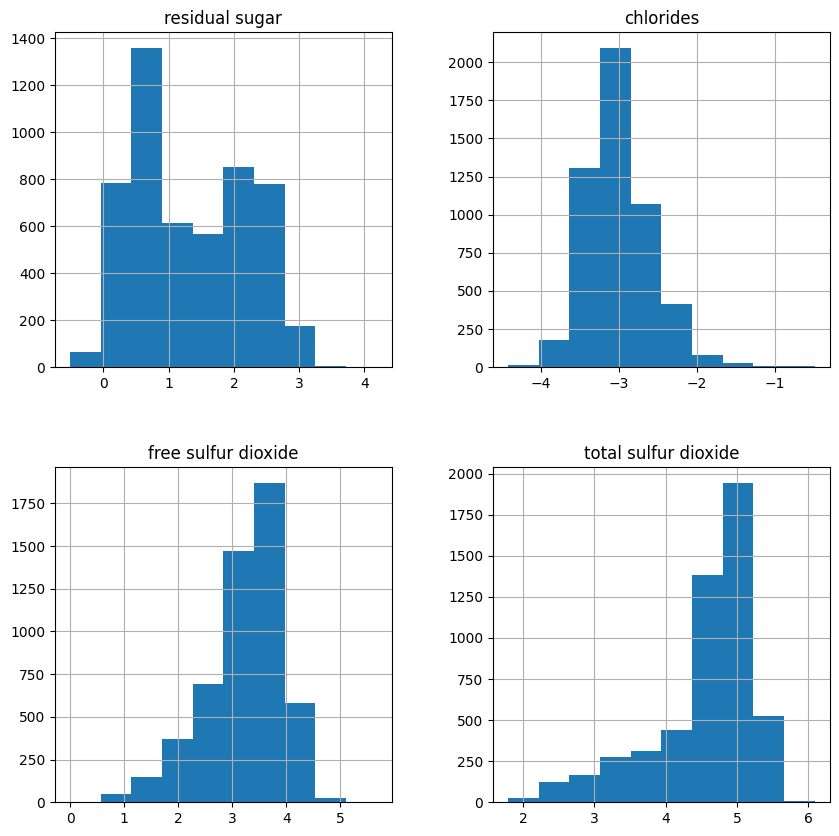

In [148]:
train_set_scaled[features_num_to_transform].hist(figsize = (10,10));

In [149]:
scaler = StandardScaler()
train_set_scaled[features_num] = scaler.fit_transform(train_set[features_num])
test_set_scaled[features_num] = scaler.transform(test_set[features_num])

### Análisis variables categóricas

In [150]:
features_cat = ['class']

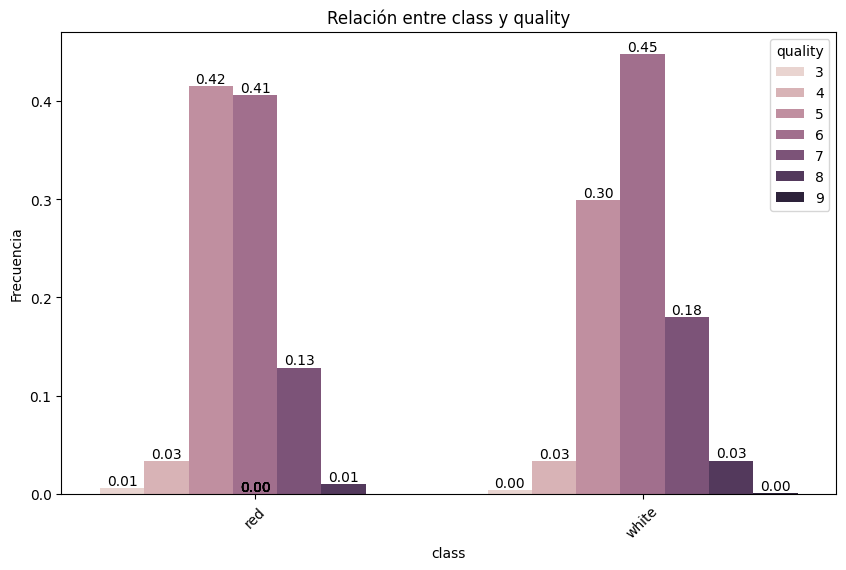

In [151]:
bt.plot_categorical_relationship_fin(train_set, cat_col1 = 'class', cat_col2=target_cat, relative_freq = True, show_values=True)

Hay cierta diferencia entre las calidades 5 y 6, pero en el resto de calidades la distribución es similar. Nos la quedamos para el modelo

### Encoding de la variable categórica

In [152]:
encoder = OrdinalEncoder() # White: 0, Red: 1

train_set[features_cat] = encoder.fit_transform(train_set[features_cat])
test_set[features_cat] = encoder.transform(test_set[features_cat])

train_set_scaled[features_cat] = encoder.fit_transform(train_set_scaled[features_cat])
test_set_scaled[features_cat] = encoder.transform(test_set_scaled[features_cat])

### Creación de los conjuntos x e y

In [153]:
x_train = train_set.drop(columns = target_cat, axis = 1)
y_train = train_set[target_cat]
x_test = test_set.drop(columns = target_cat, axis = 1)
y_test = test_set[target_cat]

x_train_scaled = train_set_scaled.drop(columns= target_cat, axis = 1)
x_test_scaled = test_set_scaled.drop(columns=target_cat, axis = 1)

Poner las variables escaladas para el modelo KNN

### Convertir los valores de la variable target

In [154]:
# Hay que hacer esto porque el modelo XGBoost no entiende los números y hay que ponerlos de manera consecutiva.
le = LabelEncoder()
y_train = le.fit_transform(y_train)  # Reindexa las clases a [0, 1, 2, 3, 4, 5, 6]
y_test = le.transform(y_test)

print("Clases originales:", sorted(set(le.classes_)))
print("Clases reindexadas:", sorted(set(y_train)))

Clases originales: [3, 4, 5, 6, 7, 8, 9]
Clases reindexadas: [0, 1, 2, 3, 4, 5, 6]


### Selección de modelos

In [155]:
knn_clf = KNeighborsClassifier(n_neighbors = 5) # Modelo 'baseline'
knn_clf_2 = KNeighborsClassifier(n_neighbors = 3)
lgbm_clf = LGBMClassifier(max_depth = 5, verbose = -100, random_state = 42)
rf_clf = RandomForestClassifier(max_depth = 5, random_state = 42)
xgb_clf = XGBClassifier(max_depth = 5, random_state = 42)

### Validación cruzada de los modelos

In [156]:
modelos = {'KNN clf': knn_clf,
           'KNN clf 2': knn_clf_2,
           'LGBM clf': lgbm_clf,
           'Random Forest clf': rf_clf,
           'XGB clf': xgb_clf}

for name, model in modelos.items():
    print(f'Modelo {name}:', end=' ')
    if 'KNN' in name:
        print(np.mean(cross_val_score(model, x_train_scaled, y_train, cv = 5, scoring = 'balanced_accuracy')))
    else:
        print(np.mean(cross_val_score(model, x_train, y_train, cv = 5, scoring = 'balanced_accuracy')))

Modelo KNN clf: 0.2620932715363066
Modelo KNN clf 2: 0.2947861295079864
Modelo LGBM clf: 0.31637964768380183
Modelo Random Forest clf: 0.2141386727149926
Modelo XGB clf: 0.3344886923790694


Los modelos nos dan una resultados bajos debido a la calidad de los datos. Vamos a intentar añadir un hiperparámetro para cada modelo y que balancee las clases.

In [157]:
knn_clf = KNeighborsClassifier(n_neighbors = 5, weights='distance') # Modelo 'baseline'
knn_clf_2 = KNeighborsClassifier(n_neighbors = 3, weights='distance')
lgbm_clf = LGBMClassifier(max_depth = 5, verbose = -100, random_state = 42, class_weight='balanced')
rf_clf = RandomForestClassifier(max_depth = 5, random_state = 42, class_weight='balanced')
xgb_clf = XGBClassifier(max_depth = 5, random_state = 42)

In [158]:
modelos = {'KNN clf': knn_clf,
           'KNN clf 2': knn_clf_2,
           'LGBM clf': lgbm_clf,
           'Random Forest clf': rf_clf,
           'XGB clf': xgb_clf}

for name, model in modelos.items():
    print(f'Modelo {name}:', end=' ')
    if 'KNN' in name:
        print(np.mean(cross_val_score(model, x_train_scaled, y_train, cv = 5, scoring = 'balanced_accuracy')))
    else:
        print(np.mean(cross_val_score(model, x_train, y_train, cv = 5, scoring = 'balanced_accuracy')))

Modelo KNN clf: 0.3449073073291887
Modelo KNN clf 2: 0.36088969829704004
Modelo LGBM clf: 0.3609490761200564
Modelo Random Forest clf: 0.31647931771578464
Modelo XGB clf: 0.3344886923790694


El mejor modelo obtenido es `LGBM clf` con un recall medio del 36%. También vamos a entrenar el modelo baseline para ver si se puede mejorar

In [159]:
lgbm_clf.fit(x_train, y_train)

LGBMClassifier(class_weight='balanced', max_depth=5, random_state=42,
               verbose=-100)

In [160]:
y_pred = lgbm_clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.22      0.33      0.26        43
           2       0.66      0.66      0.66       432
           3       0.63      0.45      0.53       562
           4       0.43      0.71      0.54       210
           5       0.46      0.53      0.50        47

    accuracy                           0.56      1300
   macro avg       0.40      0.45      0.41      1300
weighted avg       0.59      0.56      0.56      1300



Mejora del modelo con Gridsearchcv

In [161]:
# Modelo LGBM
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'class_wegiht': ['balanced', None]
}

lgbm_grid = GridSearchCV(lgbm_clf, param_grid = param_grid, cv = 5, scoring = 'balanced_accuracy')
lgbm_grid.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=LGBMClassifier(class_weight='balanced', max_depth=5,
                                      random_state=42, verbose=-100),
             param_grid={'class_wegiht': ['balanced', None],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='balanced_accuracy')

In [162]:
lgbm_grid.best_score_

0.3872103584027303

In [163]:
y_pred = lgbm_grid.best_estimator_.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.11      0.42      0.18        43
           2       0.57      0.55      0.56       432
           3       0.63      0.20      0.30       562
           4       0.29      0.43      0.35       210
           5       0.13      0.55      0.21        47
           6       0.00      0.00      0.00         0

    accuracy                           0.37      1300
   macro avg       0.25      0.31      0.23      1300
weighted avg       0.52      0.37      0.39      1300



c:\Users\usuar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\usuar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\usuar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

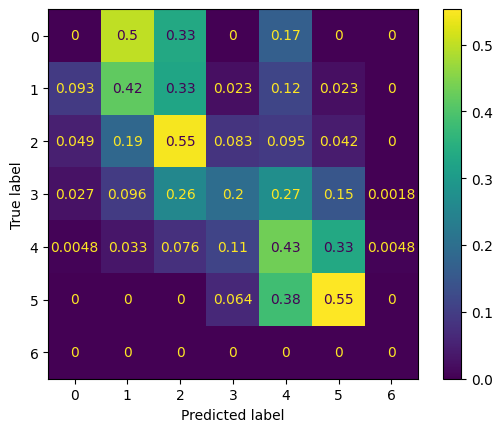

In [164]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true');

El modelo ha mejorado un poco pero tampoco mucho. Vamos a probar con técnicas de oversampling / undersampling para ver si mejora el modelo. Usaremos la técnica SMOTE para aumentar el número de muestras.

In [165]:
smote = SMOTE(random_state=42, k_neighbors = 3)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [166]:
modelo_smote = LGBMClassifier(random_state=42)
modelo_smote.fit(x_train_smote, y_train_smote)

y_pred_smote = modelo_smote.predict(x_test)
print(classification_report(y_test, y_pred_smote))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.33      0.35      0.34        43
           2       0.73      0.68      0.70       432
           3       0.64      0.62      0.63       562
           4       0.52      0.63      0.57       210
           5       0.56      0.49      0.52        47
           6       0.00      0.00      0.00         0

    accuracy                           0.62      1300
   macro avg       0.40      0.40      0.39      1300
weighted avg       0.63      0.62      0.63      1300



c:\Users\usuar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\usuar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\usuar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

Hemos conseguido cierta mejora en el recall medio haciendo un oversampling de los datos, pero sigue sin detectar  correctamente ninguno de la categoría 0 o 6.

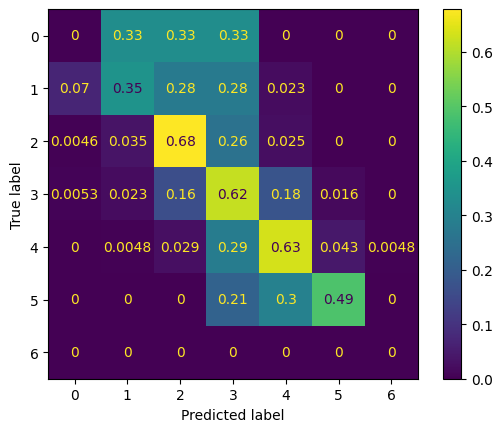

In [167]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_smote, normalize = 'true');

### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

In [168]:
target_num = 'alcohol'

In [169]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5197 entries, 1916 to 860
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5197 non-null   float64
 1   volatile acidity      5197 non-null   float64
 2   citric acid           5197 non-null   float64
 3   residual sugar        5197 non-null   float64
 4   chlorides             5197 non-null   float64
 5   free sulfur dioxide   5197 non-null   float64
 6   total sulfur dioxide  5197 non-null   float64
 7   density               5197 non-null   float64
 8   pH                    5197 non-null   float64
 9   sulphates             5197 non-null   float64
 10  alcohol               5197 non-null   float64
 11  quality               5197 non-null   int64  
 12  class                 5197 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 568.4 KB


In [170]:
features_cat = ['quality','class']
features_num = train_set.columns.to_list()
features_num.remove(target_num)

In [171]:
features_all = features_cat + features_num

Análisis de la variable target

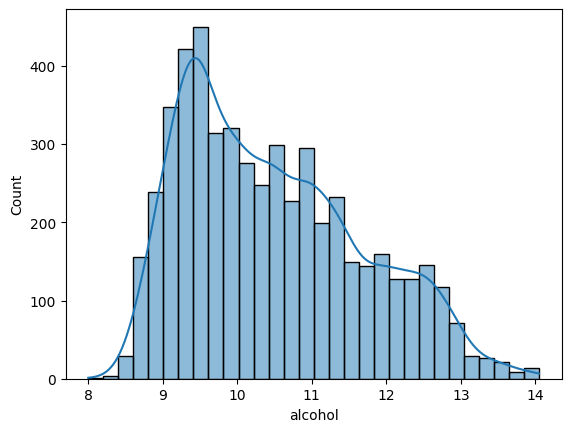

In [172]:
sns.histplot(train_set[target_num], kde = True);

Tiene una buena distribución aunque está un poco ladeada hacia la izquierda

### Correlación de las variables con la target

In [173]:
corr = train_set.corr()
np.abs(corr[target_num]).sort_values(ascending = False)

alcohol                 1.000000
density                 0.682345
quality                 0.450403
residual sugar          0.357459
total sulfur dioxide    0.272970
chlorides               0.260508
free sulfur dioxide     0.188460
pH                      0.116497
fixed acidity           0.091964
volatile acidity        0.036041
class                   0.026966
citric acid             0.005690
sulphates               0.000412
Name: alcohol, dtype: float64

In [174]:
criterio = 0.15

features_selected_reg = []

for col in corr.columns:
    if abs(corr[target_num][col]) > criterio and col != target_num:
        features_selected_reg.append(col)
    else:
        print(f"La columna '{col}' tiene una correlación baja")

La columna 'fixed acidity' tiene una correlación baja
La columna 'volatile acidity' tiene una correlación baja
La columna 'citric acid' tiene una correlación baja
La columna 'pH' tiene una correlación baja
La columna 'sulphates' tiene una correlación baja
La columna 'alcohol' tiene una correlación baja
La columna 'class' tiene una correlación baja


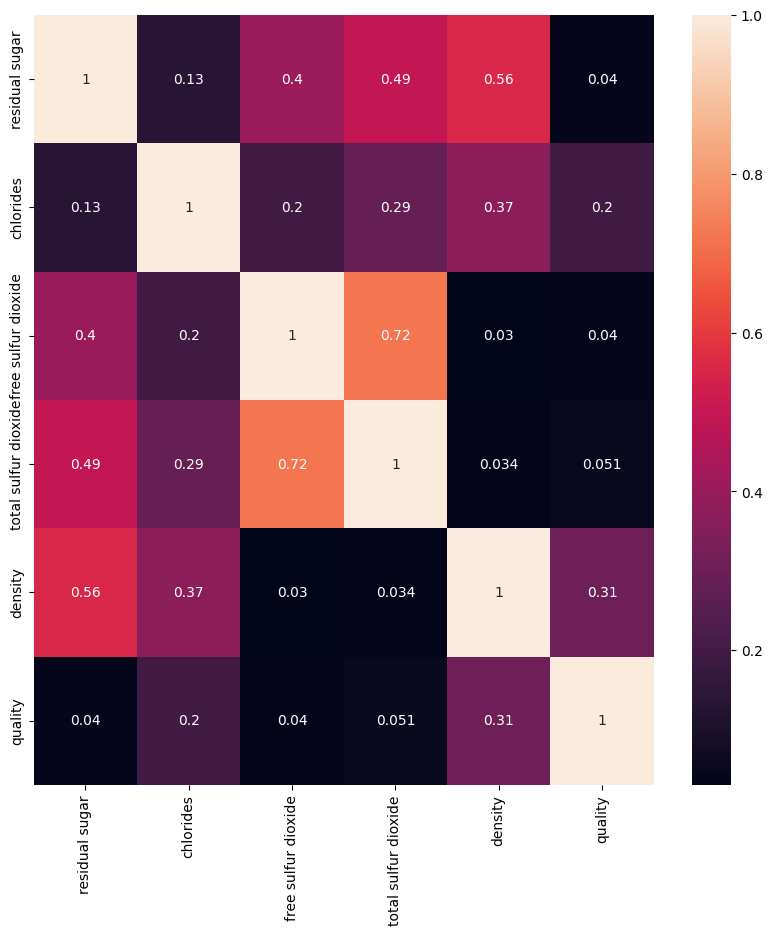

In [175]:
plt.figure(figsize=(10,10))
sns.heatmap(np.abs(corr.loc[features_selected_reg, features_selected_reg]), annot = True)
plt.show()

Eliminamos la variable que tiene una alta correlación con otra variable independiente: `free sulfur dioxide`

In [176]:
features_selected_reg.remove('free sulfur dioxide')

In [177]:
features_selected_reg

['residual sugar', 'chlorides', 'total sulfur dioxide', 'density', 'quality']

Modelos seleccionados

In [178]:
lin_reg = LinearRegression()
rf_reg = RandomForestRegressor(max_depth = 10, random_state=42)
xgb_reg = XGBRegressor(max_depth = 10, random_state = 42)
lgbm_reg = LGBMRegressor(max_depth = 10, random_state=42)

In [187]:
x_train = train_set.drop(columns='alcohol', axis = 1)
y_train = train_set[target_num]
x_test = test_set.drop(columns='alcohol', axis = 1)
y_test = test_set[target_num]

x_train_scaled = train_set_scaled.drop(columns='alcohol', axis = 1)
x_test_scaled = test_set_scaled.drop(columns='alcohol', axis = 1)

In [188]:
train_set_scaled = train_set.copy()
test_set_scaled = test_set.copy()

In [189]:
for col in features_selected_reg:
    desplaza = 0
    if train_set_scaled[col].min() <= 0:
        desplaza = int(abs(train_set_scaled[col].min())) + 1
    train_set_scaled[col] = np.log(train_set_scaled[col] + desplaza)
    test_set_scaled[col] = np.log(test_set_scaled[col] + desplaza)

In [190]:
scaler = StandardScaler()
train_set_scaled[features_selected_reg] = scaler.fit_transform(train_set[features_selected_reg])
test_set_scaled[features_selected_reg] = scaler.transform(test_set[features_selected_reg])

In [191]:
x_train.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,class
1916,7.9,0.18,0.40,2.2,0.049,38.0,67.0,0.99600,3.33,0.93,5,0.0
947,7.1,0.18,0.74,15.6,0.044,44.0,176.0,0.99960,3.38,0.67,6,1.0
877,7.6,0.51,0.24,1.2,0.040,10.0,104.0,0.99200,3.05,0.29,6,1.0
2927,6.0,0.25,0.28,7.7,0.053,37.0,132.0,0.99489,3.06,0.50,6,1.0
6063,9.0,0.38,0.41,2.4,0.103,6.0,10.0,0.99604,3.13,0.58,7,0.0


In [192]:
x_train_scaled.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,class
1916,7.9,0.18,0.40,-0.682946,-0.206188,38.0,-0.855503,0.426887,3.33,0.93,-0.939103,0.0
947,7.1,0.18,0.74,2.118572,-0.359312,44.0,1.063516,1.622065,3.38,0.67,0.209525,1.0
877,7.6,0.51,0.24,-0.892015,-0.481811,10.0,-0.204093,-0.901088,3.05,0.29,0.209525,1.0
2927,6.0,0.25,0.28,0.466930,-0.083689,37.0,0.288866,0.058374,3.06,0.50,0.209525,1.0
6063,9.0,0.38,0.41,-0.641133,1.447549,6.0,-1.859027,0.440167,3.13,0.58,1.358153,0.0


In [193]:
modelos = {
    'Linear reg': lin_reg,
    'Random Forest reg': rf_reg,
    'XGB reg': xgb_reg,
    'LGBM reg': lgbm_reg
}

scoring = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

for nombre, modelo in modelos.items():
    scores = np.abs(cross_val_score(modelo, x_train[features_selected_reg], y_train, cv=5, scoring=scoring))
    print(f"{nombre} - MAPE promedio: {scores.mean()}")

Linear reg - MAPE promedio: 0.05502401269849168
Random Forest reg - MAPE promedio: 0.03855206165370186
XGB reg - MAPE promedio: 0.03323357982315555
LGBM reg - MAPE promedio: 0.03881961958784344


In [194]:
for nombre, modelo in modelos.items():
    scores = np.abs(cross_val_score(modelo, x_train_scaled[features_selected_reg], y_train, cv=5, scoring=scoring))
    print(f"{nombre} - MAPE promedio: {scores.mean()}")

Linear reg - MAPE promedio: 0.055024012698491706
Random Forest reg - MAPE promedio: 0.0385315197449617
XGB reg - MAPE promedio: 0.03323357982315555
LGBM reg - MAPE promedio: 0.0386142832508751


Obtenemos unos buenos resultados con todos los modelos que no superan el 0.06 (6%)

In [195]:
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'max_depth': [3, 5, 6, 8],
}

xgb_reg_grid = GridSearchCV(
    xgb_reg,
    param_grid= param_grid,
    cv = 5,
    scoring='neg_mean_absolute_percentage_error'
)
xgb_reg_grid.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=10, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.3],
                         'max_depth': [3, 5, 6, 8],
                         'n_estimators': [100, 200, 300, 500]},
             scoring='neg_mean_absolute_percentage_error')

In [198]:
print(-xgb_reg_grid.best_score_)
print(xgb_reg_grid.best_params_)

0.02263783584181032
{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 500}


In [201]:
y_pred = xgb_reg_grid.best_estimator_.predict(x_test)

In [199]:
def plot_predictions(y_real, y_pred):
    """
    Función para graficar los valores reales vs los valores predichos en una regresión.

    Args:
    y_real (array-like): Valores reales de la variable objetivo.
    y_pred (array-like): Valores predichos de la variable objetivo.
    """
    plt.figure(figsize=(8,6))
    plt.scatter(y_pred, y_real, alpha = 0.5)
    plt.xlabel('Valores predichos')
    plt.ylabel('Valores reales')

    # Línea y = x
    max_value = max(max(y_real), max(y_pred))
    min_value = min(min(y_real), min(y_pred))
    plt.plot([min_value, max_value], [min_value, max_value], 'r')

    plt.title('Comparación de los valores reales vs predichos')
    plt.show()

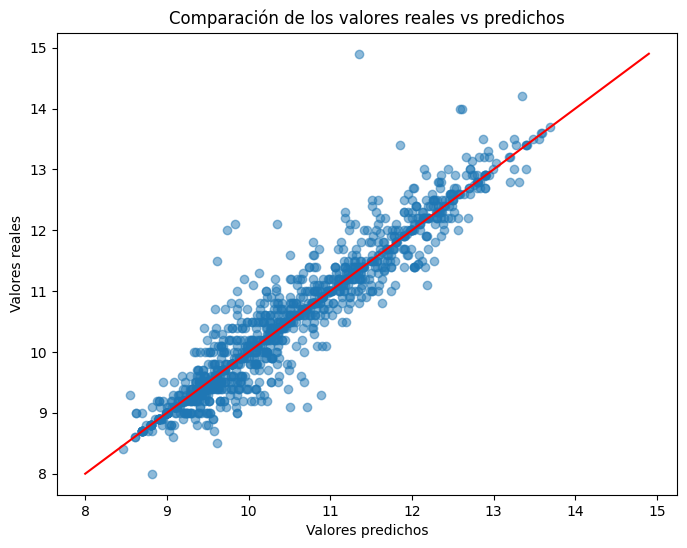

In [202]:
plot_predictions(y_test, y_pred)